In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.datasets import load_breast_cancer
from pandas_profiling import ProfileReport
import scipy as sp
import warnings
import os 
from scipy import stats
warnings.filterwarnings("ignore")

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer.data.shape

(569, 30)

assign cancer data to cancer_df

In [6]:
cancer_df=pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [7]:
cancer_df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,0.05913,...,36.32,85.07,521.3,0.1453,0.16220,0.18110,0.08698,0.2973,0.07745,1.0
60,10.17,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020,1.0
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,16.93,94.17,661.1,0.1170,0.10720,0.03732,0.05802,0.2823,0.06794,1.0
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,...,19.29,87.65,529.9,0.1026,0.24310,0.30760,0.09140,0.2677,0.08824,1.0
518,12.88,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253,...,24.37,99.31,674.7,0.1456,0.29610,0.12460,0.10960,0.2582,0.08893,1.0


In [8]:
cancer_df['target'].unique()

array([0., 1.])

In [9]:
cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

change target column data type.make it integer

In [11]:
cancer_df.target=cancer_df.target.astype('int64')

569 entries in 301 columns without any time index and all of them except target column are float. i will group all columns starting with 'means'and 'worst',ending with 'errors' colomns just in case

In [12]:
means=cancer_df.columns[[x.startswith("mean") for x in cancer_df.columns]]
worsts=cancer_df.columns[[x.startswith("worst") for x in cancer_df.columns]]
errors=cancer_df.columns[[x.endswith("error") for x in cancer_df.columns]]
[means,
worsts,
errors]

[Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension'],
       dtype='object'),
 Index(['worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='object'),
 Index(['radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error'],
       dtype='object')]

In [13]:
cancer_df.target.sum()

357

357 of 569 patients diagnosed as cancer according to our data. lets show their number in a pie chart and histogram

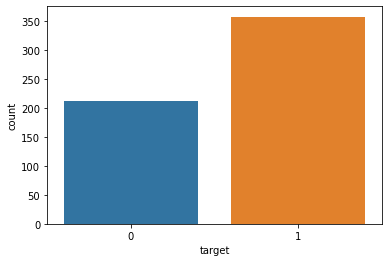

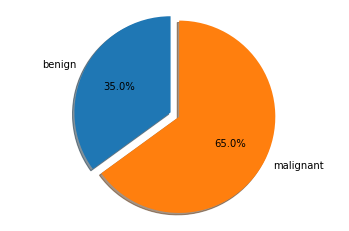

In [14]:
sns.countplot(cancer_df['target'],label="Count")

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'benign', 'malignant'
sizes = [35, 65]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'malignant')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

let's do correlation matrix in this section

In [15]:
# X is consist of our features
# drop diagnosis since we are separating labels and features 
y = cancer_df.target
X = cancer_df.drop('target',axis = 1)

sorted heatmap, this is the first time i tried it, and it seems to me more useful than regular one, at least not complex and human readable

<AxesSubplot:>

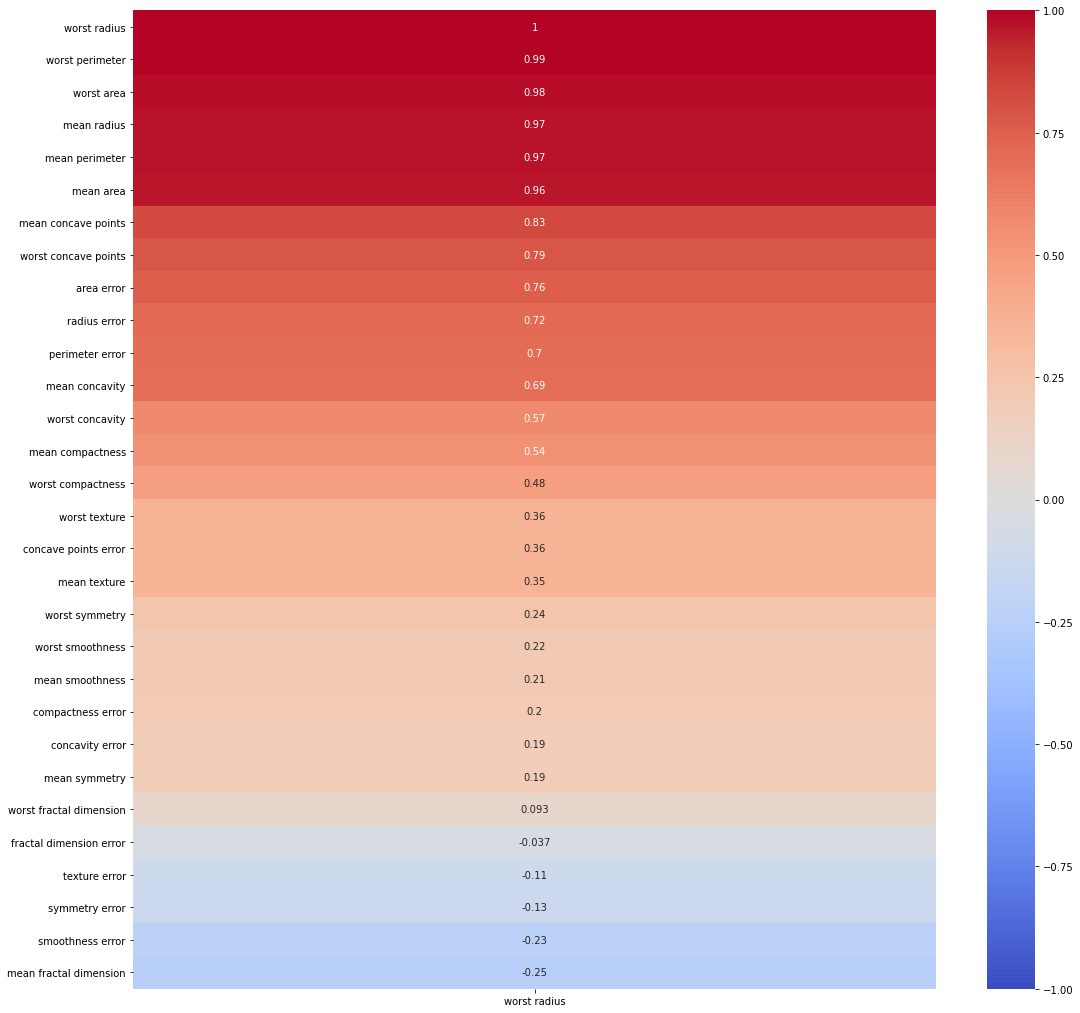

In [16]:
#correlation map between target(diagnosis result) and other variables
f,ax = plt.subplots(figsize=(18, 18))
matrix = X.corr()

sns.heatmap(matrix[['worst radius']].sort_values(by=['worst radius'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

some mean and worst columns are highly correlated. this will help predicting breast cancer or classifiying the tissues

#### tasks in this capstone are:

How to predict the breast caner

Increasing in accuracy

EDA and Prediction

## additional visualizations

In [17]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Box plots succinctly compare multiple distributions and are a great way to visualize the IQR

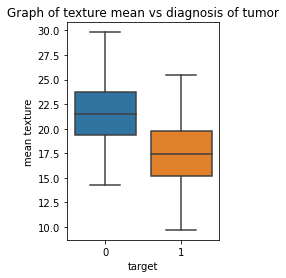

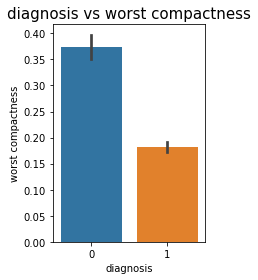

In [18]:
# create boxplots for texture mean vs diagnosis of tumor
plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='mean texture', data=cancer_df, showfliers=False)
plt.title('Graph of texture mean vs diagnosis of tumor')
plt.show()

plt.subplot(1, 2, 2)
sns.barplot(x="target", y="worst compactness", data=cancer_df)
plt.title('diagnosis vs worst compactness',fontsize=15)
plt.xlabel('diagnosis')
plt.ylabel('worst compactness')

plt.style.use("ggplot")
plt.show()


boxplot all mean columns. again for practice, i learned lots of thing while doing this.

The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). plot mean columns vs diagnosis, in total 10 column figures:

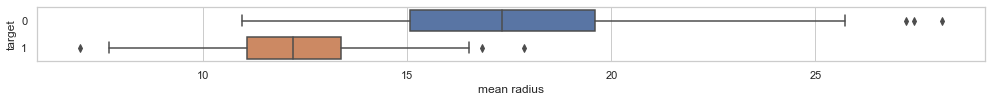

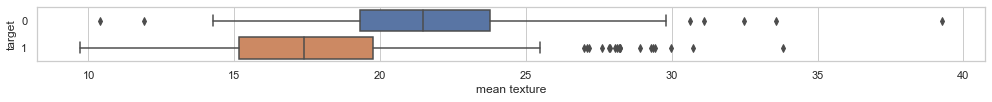

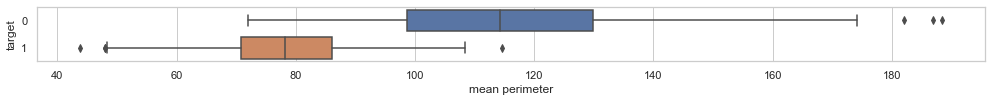

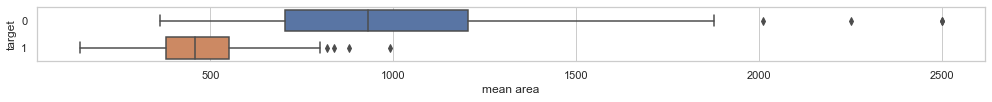

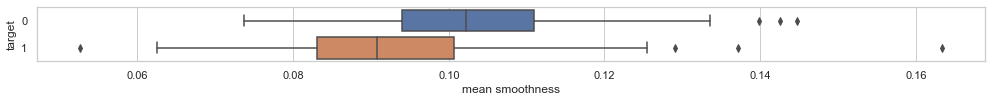

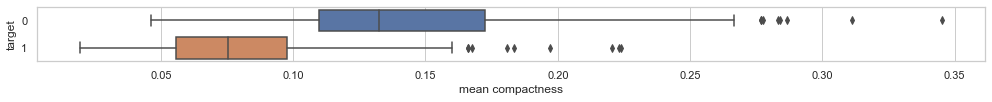

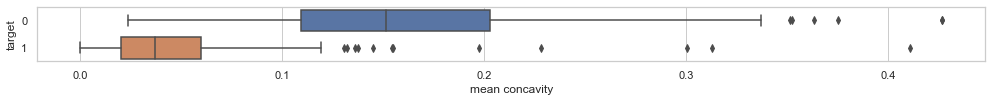

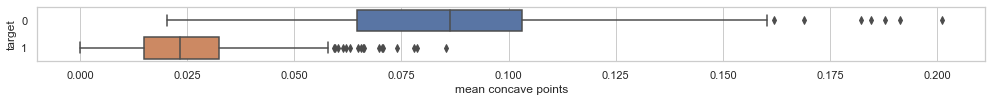

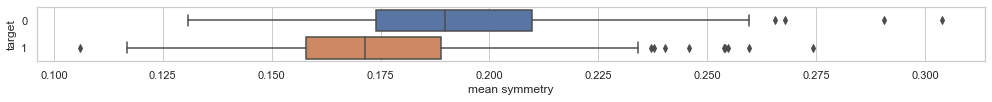

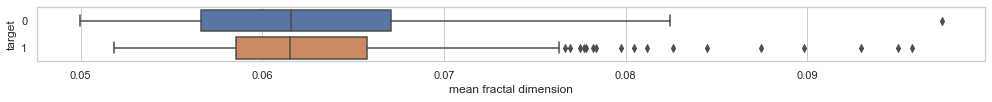

In [19]:
sns.set_theme(style="whitegrid")

for column in cancer_df[means]:
        plt.figure(figsize=(17,1))
        sns.boxplot(x=column, y='target',orient='h',data=cancer_df)


Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

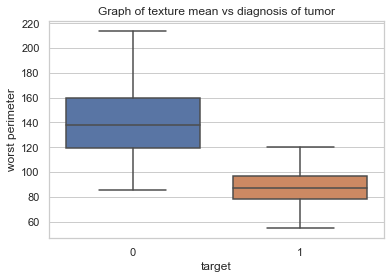

In [20]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x='target', y='worst perimeter', data=cancer_df, showfliers=False)
plot.set_title('Graph of texture mean vs diagnosis of tumor')

mean columns histograms of cancer data might give some opinions

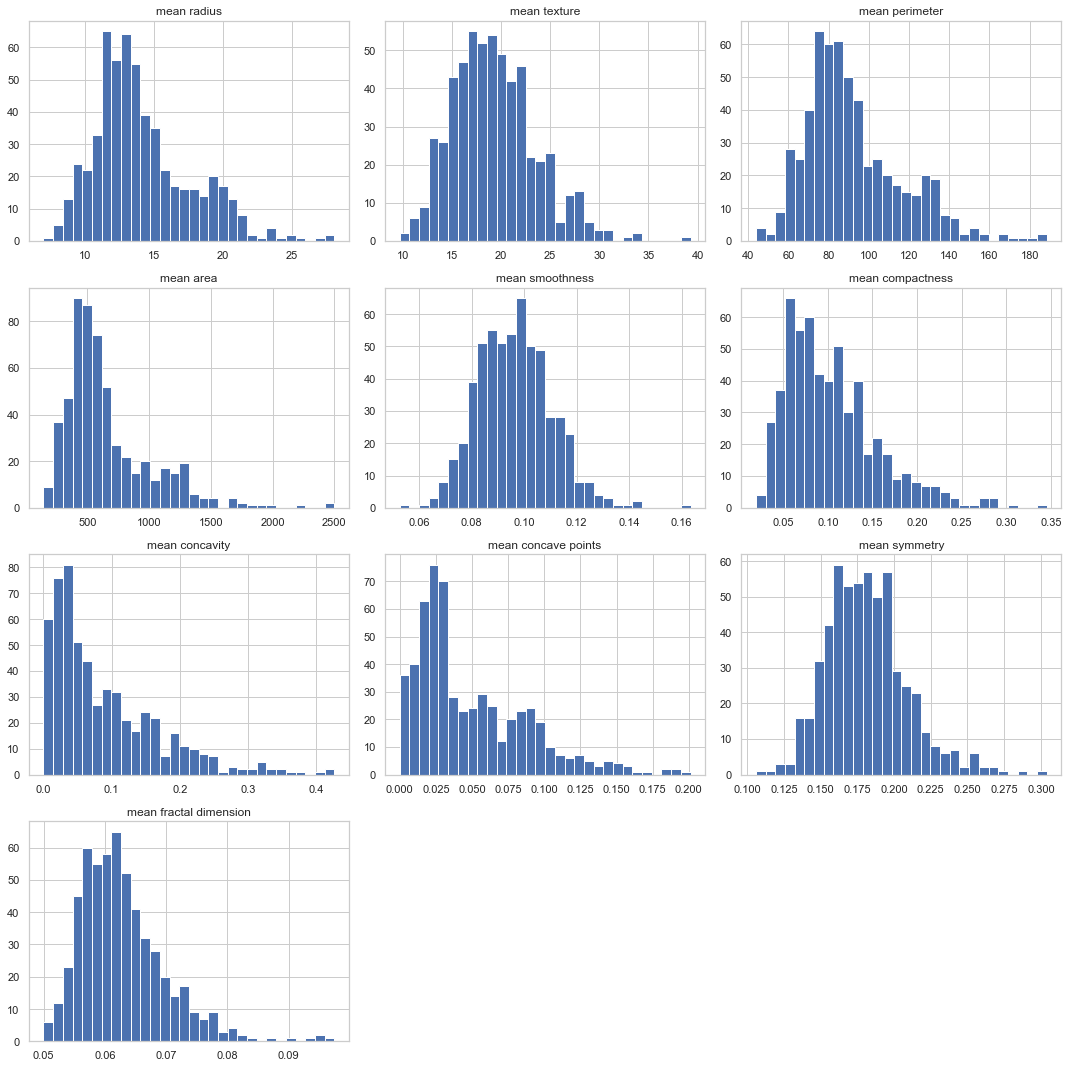

In [21]:
cancer_df[means].hist(bins=30, figsize=(15, 15))
plt.tight_layout()

distribution plot of errors also might give hints about our data

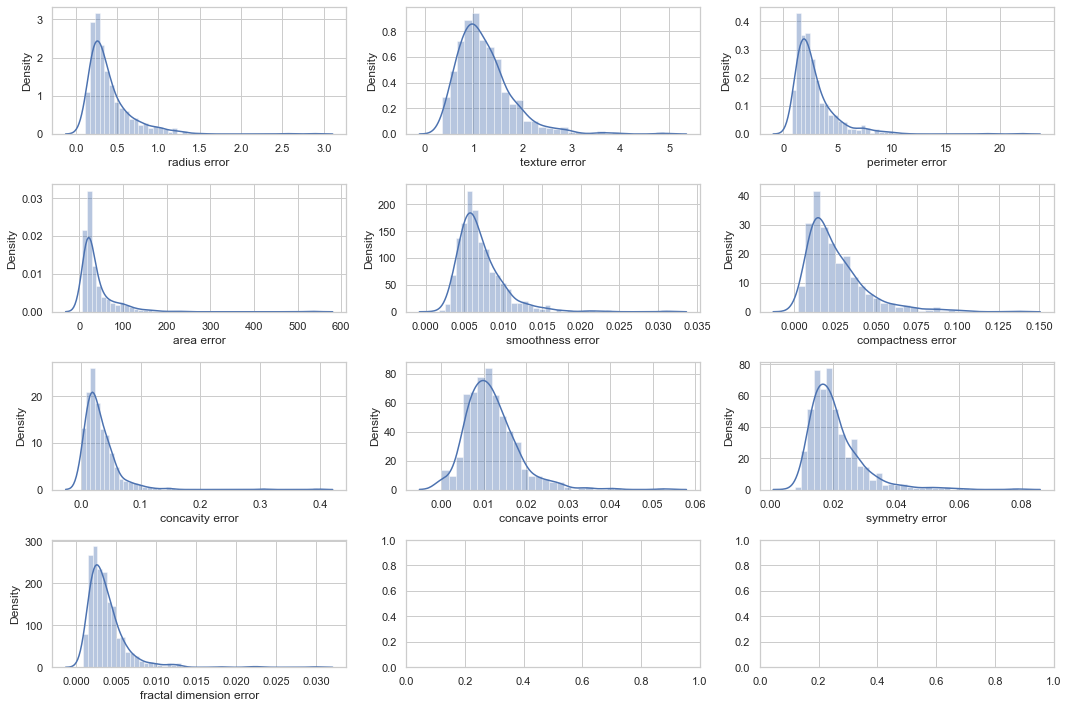

In [22]:
n_rows=4
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(15, 10))

for i, column in enumerate(cancer_df[errors].columns):
    sns.distplot(cancer_df[column],ax=axes[i//n_cols,i%n_cols])

plt.tight_layout()

t test tells us he t test tells us how significant the differences between groups are; In other words it lets us know if those differences (measured in means) could have happened by chance

In [23]:
# make a new dataframe with only the desired feature for t test  
new = pd.DataFrame(data=cancer_df)
new_d = new.set_index('target')
list(stats.ttest_ind(new_d.loc[0], new_d.loc[1]))

[array([25.43582161, 10.86720108, 26.40521298, 23.93868724,  9.14609881,
        17.69839198, 23.10396343, 29.35431859,  8.33831179, -0.30571113,
        16.39635103, -0.1977238 , 15.93415802, 15.6093429 , -1.59936481,
         7.29707744,  6.24615734, 10.64249782, -0.1552978 ,  1.86233046,
        29.33908156, 12.23098135, 29.96571739, 25.72159026, 11.06674661,
        17.44537368, 20.89717539, 31.05455512, 10.90230398,  8.1513165 ]),
 array([8.46594057e-096, 4.05863605e-025, 8.43625104e-101, 4.73456431e-088,
        1.05185036e-018, 3.93826311e-056, 9.96655576e-084, 7.10115016e-116,
        5.73338403e-016, 7.59936804e-001, 9.73894866e-050, 8.43332029e-001,
        1.65190518e-047, 5.89552139e-046, 1.10296609e-001, 9.97599465e-013,
        8.26017617e-010, 3.07230877e-024, 8.76641818e-001, 6.30735508e-002,
        8.48229192e-116, 1.07805749e-030, 5.77139714e-119, 2.82884770e-097,
        6.57514363e-026, 7.06981635e-055, 2.46466396e-072, 1.96909971e-124,
        2.95112058e-025, 2.3

first 'array' is statistics and second 'array' is p-value every column vs target(diagnosis result). except one column which has "7.59936804e-001" p value(higher than 5), all other columns reject null hypotesis. Except that column, the p value and t statistic is statistically significant for all the features in the table above

In [48]:
corr_matrix = new_d.corr().abs()
#new matrix
corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [51]:
# Find index of feature columns with correlation greater than 0.95
#to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.95)]

In [26]:
# Drop features and assign to 
X = cancer_df.drop(cancer_df[to_drop], axis=1)
X.columns

Index(['target'], dtype='object')

In [27]:
cancer_df=cancer_df.drop(['target'],axis=1)

EDA and Prediction= done

How to predict the breast cancer

Increasing in accuracy

#### PART II: PREDICTING CANCER

i will use these classifiers Logistic Regression, Support Vector Classifier, Decision Tree and Random Forest to predict if a tumor is cancer or not

In [28]:
#libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y, random_state = 42)

Unlike the other scalers, the centering and scaling statistics of RobustScaler is based on percentiles and are therefore not influenced by a few number of very large marginal outliers.so i will use RobustScaler before modeling

In [30]:
#robust scaler 
rs=RobustScaler()
rs.fit(X_train, y_train)

RobustScaler()

In [31]:
#Logistic Regression 
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
#Using SVC linear
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [33]:
#Using SVC rbf
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [34]:
#Using DecisionTreeClassifier 
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
#Using Random Forest Classifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
print('Logistic Regression Training Accuracy:', log.score(X_train, y_train)),
confusion_matrix(y_test, log.predict(X_test))

Logistic Regression Training Accuracy: 1.0


array([[ 64,   0],
       [  0, 107]], dtype=int64)

In [37]:
print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train)),
confusion_matrix(y_test, svc_lin.predict(X_test))

Support Vector Machine (Linear Classifier) Training Accuracy: 1.0


array([[ 64,   0],
       [  0, 107]], dtype=int64)

In [38]:
print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train)),
confusion_matrix(y_test, svc_rbf.predict(X_test))

Support Vector Machine (RBF Classifier) Training Accuracy: 1.0


array([[ 64,   0],
       [  0, 107]], dtype=int64)

In [39]:
roc_auc_score(y, log.predict_proba(X)[:, 1])

1.0

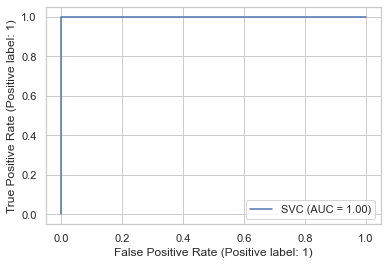

In [40]:
# Compute ROC curve for SVC classifier
metrics.plot_roc_curve(svc_lin, X_test, y_test) 

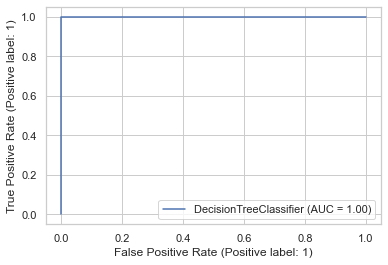

In [41]:
#random forest roc curve
metrics.plot_roc_curve(tree, X_test, y_test) 

In [42]:
print('Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train)),
tree.score(X_train, y_train)

Decision Tree Classifier Training Accuracy: 1.0


1.0

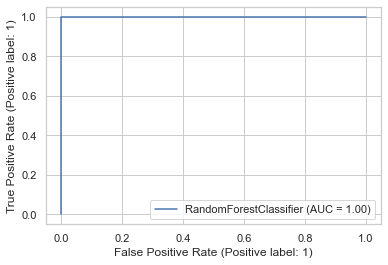

In [43]:
#random forest roc curve
metrics.plot_roc_curve(forest, X_test, y_test) 

In [44]:
print('Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train)),
forest.score(X_train, y_train)

Random Forest Classifier Training Accuracy: 1.0


1.0

#### i tried to create a dictionary of predictions and model names to make it easier calculating classification report and scores. is there any other easier way?

In [45]:
preds={"logistic:":[log.predict(X_test)],"svm-lineer:":[svc_lin.predict(X_test)],"svm-rbf:":[svc_rbf.predict(X_test)],
       "decision tree:":[tree.predict(X_test)],"random forest:":[forest.predict(X_test)]}
preds.keys

<function dict.keys>

In [46]:
report_data=classification_report(y_test, log.predict(X_test))

classification report with seperate scores, like precision,recall,f1_score etc. just to learn

In [55]:
'''
for y_pred in preds:
    classification_report(y_test, y_pred)
    '''

'\nfor y_pred in preds:\n    classification_report(y_test, y_pred)\n    '

#### will use this if i can create a dictionary above

In [56]:
'''
for i in preds:
     #Check precision, recall, f1-score
     print(classification_report(y_test,i))
     #Another way to get the models accuracy on the test data
     print(accuracy_score(y_test, i))
     print()#Print a new line
     '''

'\nfor i in preds:\n     #Check precision, recall, f1-score\n     print(classification_report(y_test,i))\n     #Another way to get the models accuracy on the test data\n     print(accuracy_score(y_test, i))\n     print()#Print a new line\n     '

classification_report for logistic prediction model

In [58]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       107

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



## different direction than my first plan

#### i found and edited this for my code,it is working, i put the models i want to use.it fits and prints all of them, i think i can add more thing in it. later i can use this for predictions, calculating scores and someother...

In [59]:
# Define a function which trains models
def models(X_train,y_train):
    
  #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
  #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
  #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
  #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    return log, svc_lin, svc_rbf, tree, forest
#get the training results
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 1.0
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 1.0
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 1.0
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 1.0


In [60]:
for i in range(len(model)):
 print('Model',i)
 #Check precision, recall, f1-score
 print(classification_report(y_test, model[i].predict(X_test)))
 #Another way to get the models accuracy on the test data
 print(accuracy_score(y_test, model[i].predict(X_test)))
 print()#Print a new line

Model 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       107

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

1.0

Model 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       107

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

1.0

Model 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       107

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1

EDA and Prediction= done

How to predict the breast cancer= done

Increasing in accuracy

#### PART II: INCREASING ACCURACY HYPERPARAMETER TUNING

In [61]:
#make the scoring function with a beta = 2

ftwo_scorer = make_scorer(fbeta_score, beta=2)
# Create logistic regression
logistic = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.arange(0, 1, 0.001)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, scoring=ftwo_scorer, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.015


i think ROC curve might help.
ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.